# Schwarshild Einstein Tensor calculations using Symbolic module

### a test of the Einstien PY project module. 
Abstract: Completely standard Schwarshild produces expected results, G = 0, for instance.

In [18]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols, sin, cos, sinh
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

sympy.init_printing()

### Use plain coordinates.
Coordinate:
ds**2 - same formula as for normal, but metric is signature 4



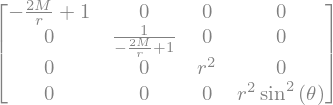

In [19]:
syms = sympy.symbols("t r theta phi")
G, M, c, a, w = sympy.symbols("G M c a w")
a = 2*M
# using metric values of schwarschild space-time
# a is schwarzschild radius
# NOTE 00 component is POSITIVE signature 4 metric.
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = (1 - a/syms[1])
list2d[0][1] = 0
list2d[1][0] = 0
list2d[1][1] = 1/(1 - a/syms[1]) 
list2d[2][2] = (syms[1])**2
list2d[3][3] = (syms[1])**2*(sympy.sin(syms[2]) ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()


### Calculating the Einstein Tensor (with both indices covariant)

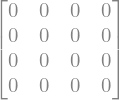

In [20]:
einst = EinsteinTensor.from_metric(sch)
einst.simplify()
einst.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

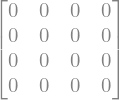

In [21]:
ri = RicciTensor.from_metric(sch)
ri.simplify()
ri.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

#Zero like it should be 


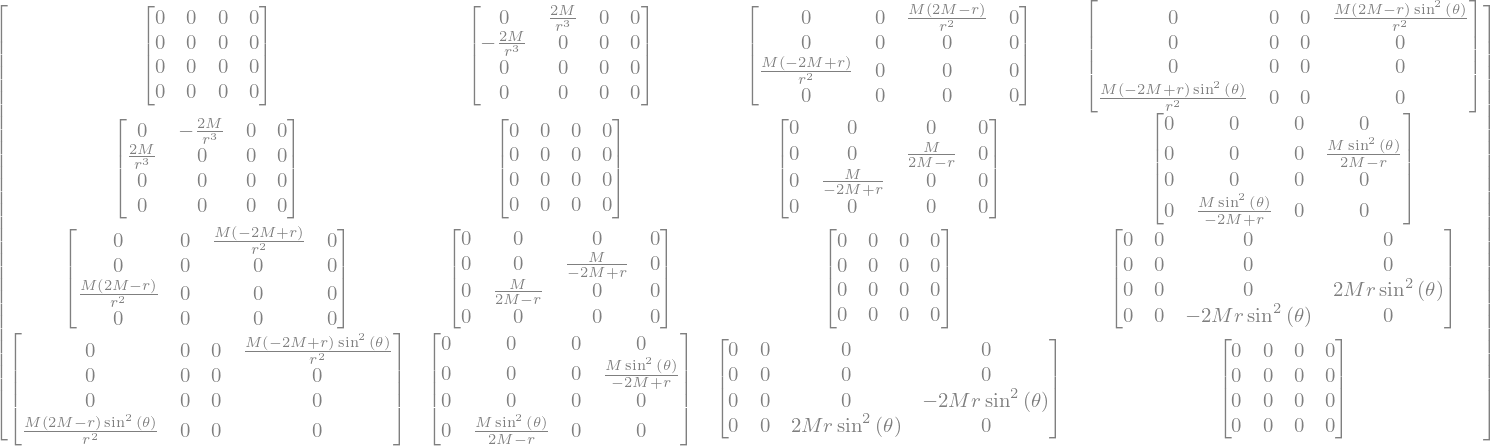

In [14]:
# what is the Weyl tensor?
weyl = WeylTensor.from_metric(sch)
weyl.tensor() # all components!

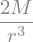

In [15]:
weyl[0,1,0,1]

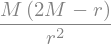

In [16]:
weyl[0,2,0,2]

(t, r, theta, phi, M)


Text(0.5, 1.0, 'T_01')

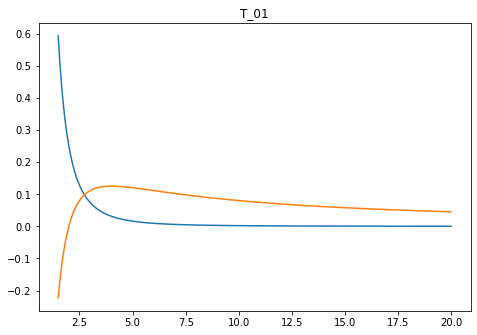

In [17]:
###Plot something
# first make the tensor into a function, printing 
args, func = weyl.tensor_lambdify()
print(args) # these are the argument values 

#Make x values - which we will sub in for r 
x = np.arange(1.5, 20.0, 0.04)
func(0.5,x,0, 0, 1)[0][1][0][1]

# Call the functions
y = func(1.0,x,1, 1, 1)[0][1][0][1]
z = -func(1.0,x,1, 1, 1)[0][2][0][2] # 0.1 to bring scale in
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
ax.plot(x,z)
ax.set_title("T_01")


